In [6]:
import pandas as pd
import numpy as np
from scipy import integrate

In [7]:
FILEPATH = "../../csv/metrics/ETHUSD-600-20210401-20210630"

In [8]:
FILENAME_KS = f"{FILEPATH}-ks.csv"

In [9]:
df_ks = pd.read_csv(FILENAME_KS)
df_ks

,Unnamed: 0,alpha=0.01,alpha=0.025,alpha=0.05,alpha=0.075,alpha=0.1
0,n=86400,2.676722e-06,1.573218e-06,1.085034e-06,8.736135e-07,7.420050e-07
1,n=172800,2.115967e-06,1.244877e-06,8.595125e-07,6.926202e-07,5.887304e-07
2,n=259200,1.844423e-06,1.085880e-06,7.503045e-07,6.049749e-07,5.145078e-07
3,n=345600,1.673315e-06,9.856903e-07,6.814891e-07,5.497468e-07,4.677378e-07
4,n=432000,1.551689e-06,9.144744e-07,6.325742e-07,5.104900e-07,4.344930e-07
5,n=518400,1.458963e-06,8.601800e-07,5.952819e-07,4.805609e-07,4.091476e-07
6,n=604800,1.384941e-06,8.168376e-07,5.655121e-07,4.566690e-07,3.889146e-07
7,n=691200,1.323893e-06,7.810919e-07,5.409600e-07,4.369647e-07,3.722280e-07
8,n=777600,1.272305e-06,7.508858e-07,5.202129e-07,4.203139e-07,3.581273e-07
9,n=864000,1.227883e-06,7.248751e-07,5.023474e-07,4.059759e-07,3.459851e-07


In [10]:
# 30d in is in seconds ...
30 * 86400

2592000

<AxesSubplot:>

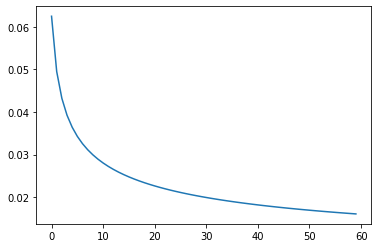

In [11]:
(df_ks['alpha=0.05'] * 2 * 3600 * 8).plot()

In [12]:
# looks right at VaR => 0 after 30d charging about ~2% per 8h in extreme

In [13]:
# Look at the EV, VaR, ES calcs

In [14]:
FILENAME_VARS = f"{FILEPATH}-nvars-long-alpha-0.05.csv"

In [15]:
df_vars = pd.read_csv(FILENAME_VARS)
df_vars

,Unnamed: 0,k=1.085034172449585e-06,k=8.595124868742567e-07,k=7.503045279039347e-07,k=6.814890575778717e-07,k=6.32574188945293e-07,k=5.952819360198797e-07,k=5.655120820061992e-07,k=5.409600379512467e-07,k=5.202128764269743e-07,...,k=2.942055530451567e-07,k=2.923569061612607e-07,k=2.905553352519495e-07,k=2.887987866527444e-07,k=2.870853322194003e-07,k=2.8541315953886223e-07,k=2.8378056306294137e-07,k=2.821859360632414e-07,k=2.8062776331856415e-07,k=2.7910461445694035e-07
0,t=3600,0.015206,0.016856,0.017656,0.018160,0.018519,0.018792,0.019011,0.019191,0.019343,...,0.021003,0.021017,0.021030,0.021043,0.021055,0.021068,0.021080,0.021091,0.021103,0.021114
1,t=7200,0.020792,0.024112,0.025724,0.026741,0.027465,0.028016,0.028457,0.028821,0.029128,...,0.032483,0.032511,0.032537,0.032563,0.032589,0.032614,0.032638,0.032662,0.032685,0.032708
2,t=10800,0.024179,0.029181,0.031611,0.033146,0.034238,0.035071,0.035737,0.036286,0.036751,...,0.041824,0.041866,0.041907,0.041946,0.041985,0.042022,0.042059,0.042095,0.042130,0.042164
3,t=14400,0.026335,0.033023,0.036277,0.038333,0.039796,0.040914,0.041807,0.042543,0.043167,...,0.049979,0.050035,0.050089,0.050142,0.050194,0.050245,0.050294,0.050342,0.050389,0.050435
4,t=18000,0.027660,0.036037,0.040119,0.042699,0.044536,0.045940,0.047061,0.047987,0.048770,...,0.057338,0.057408,0.057477,0.057544,0.057609,0.057673,0.057735,0.057796,0.057855,0.057913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,t=5169600,-0.999759,-0.997517,-0.992321,-0.984357,-0.974061,-0.961857,-0.948110,-0.933115,-0.917112,...,-0.142326,-0.125775,-0.109339,-0.093015,-0.076804,-0.060705,-0.044715,-0.028834,-0.013062,0.002604
1436,t=5173200,-0.999760,-0.997529,-0.992352,-0.984412,-0.974143,-0.961969,-0.948250,-0.933284,-0.917310,...,-0.142976,-0.126426,-0.109991,-0.093668,-0.077457,-0.061357,-0.045367,-0.029487,-0.013714,0.001952
1437,t=5176800,-0.999762,-0.997541,-0.992383,-0.984468,-0.974226,-0.962080,-0.948390,-0.933453,-0.917507,...,-0.143626,-0.127077,-0.110642,-0.094320,-0.078109,-0.062010,-0.046020,-0.030139,-0.014365,0.001302
1438,t=5180400,-0.999763,-0.997553,-0.992413,-0.984523,-0.974308,-0.962191,-0.948530,-0.933621,-0.917703,...,-0.144276,-0.127728,-0.111293,-0.094972,-0.078761,-0.062662,-0.046672,-0.030790,-0.015017,0.000651


In [11]:
# get k at 30d to use for VaR plots
print('n[29]', df_ks['Unnamed: 0'][29])
print('k[29]', df_ks['alpha=0.05'][29])

n[29] n=2592000
k[29] 3.158327403345918e-07


In [12]:
f"k={df_ks['alpha=0.05'][29]}" in df_vars.columns

True

In [13]:
df_vars[f"k={df_ks['alpha=0.05'][29]}"]

0       0.014797
1       0.023219
2       0.030104
3       0.036120
4       0.041546
          ...   
1435   -0.468694
1436   -0.469232
1437   -0.469771
1438   -0.470309
1439   -0.470846
Name: k=3.158327403345918e-07, Length: 1440, dtype: float64

In [14]:
# vars calculated to 60d out ...
5184000/86400

60.0

In [15]:
# at 30d, should get var = 0

In [16]:
5184000/2

2592000.0

In [17]:
# this is the element/row + 1 index in vars df
2592000.0 / 3600

720.0

In [18]:
df_vars.iloc[719]

Unnamed: 0                  t=2592000
k=8.978757512936804e-07     -0.951067
k=7.267413010472394e-07     -0.881181
k=6.420114480155384e-07     -0.815648
k=5.878747660242412e-07     -0.755922
                              ...    
k=2.5999599979921576e-07     0.335703
k=2.585607131804177e-07      0.345678
k=2.5715782864008127e-07       0.3555
k=2.557860746607888e-07      0.365174
k=2.5444425010367986e-07     0.374703
Name: 719, Length: 61, dtype: object

In [19]:
# nice ... goes to zero exactly at 30d out (index 719). Math! :)
df_vars[f"k={df_ks['alpha=0.05'][29]}"][715:725]

715    0.002825
716    0.002119
717    0.001413
718    0.000707
719    0.000000
720   -0.000707
721   -0.001414
722   -0.002121
723   -0.002828
724   -0.003535
Name: k=3.158327403345918e-07, dtype: float64

<AxesSubplot:>

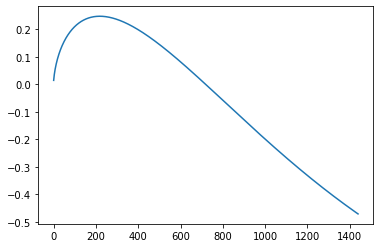

In [20]:
# look at the VaR curve from 0 => 60d when holding a position, assuming alpha=0.05, t_alpha=30d for calibration
# imbalance completely to one side
df_vars[f"k={df_ks['alpha=0.05'][29]}"].plot()

In [21]:
# express the x axis in terms of days to make life easier ...
taus = [(i+1) * 3600.0 / 86400.0 for i in df_vars.index]
taus

[0.041666666666666664,
 0.08333333333333333,
 0.125,
 0.16666666666666666,
 0.20833333333333334,
 0.25,
 0.2916666666666667,
 0.3333333333333333,
 0.375,
 0.4166666666666667,
 0.4583333333333333,
 0.5,
 0.5416666666666666,
 0.5833333333333334,
 0.625,
 0.6666666666666666,
 0.7083333333333334,
 0.75,
 0.7916666666666666,
 0.8333333333333334,
 0.875,
 0.9166666666666666,
 0.9583333333333334,
 1.0,
 1.0416666666666667,
 1.0833333333333333,
 1.125,
 1.1666666666666667,
 1.2083333333333333,
 1.25,
 1.2916666666666667,
 1.3333333333333333,
 1.375,
 1.4166666666666667,
 1.4583333333333333,
 1.5,
 1.5416666666666667,
 1.5833333333333333,
 1.625,
 1.6666666666666667,
 1.7083333333333333,
 1.75,
 1.7916666666666667,
 1.8333333333333333,
 1.875,
 1.9166666666666667,
 1.9583333333333333,
 2.0,
 2.0416666666666665,
 2.0833333333333335,
 2.125,
 2.1666666666666665,
 2.2083333333333335,
 2.25,
 2.2916666666666665,
 2.3333333333333335,
 2.375,
 2.4166666666666665,
 2.4583333333333335,
 2.5,
 2.5416666

In [22]:
# check 1d is 1d
taus[23]

1.0

In [23]:
# set back in df vars (remember, tau is in days)
df_vars['tau'] = taus
df_vars

,Unnamed: 0,k=8.978757512936804e-07,k=7.267413010472394e-07,k=6.420114480155384e-07,k=5.878747660242412e-07,k=5.489995419952228e-07,k=5.191209815782905e-07,k=4.951090149472851e-07,k=4.7519193377437073e-07,k=4.582770594735901e-07,...,k=2.660893824286825e-07,k=2.645101616462856e-07,k=2.629692505879826e-07,k=2.6146503586240116e-07,k=2.5999599979921576e-07,k=2.585607131804177e-07,k=2.5715782864008127e-07,k=2.557860746607888e-07,k=2.5444425010367986e-07,tau
0,t=3600,0.010553,0.011799,0.012416,0.012811,0.013094,0.013312,0.013488,0.013633,0.013756,...,0.015160,0.015172,0.015183,0.015194,0.015205,0.015215,0.015225,0.015235,0.015245,0.041667
1,t=7200,0.014679,0.017182,0.018424,0.019218,0.019789,0.020228,0.020581,0.020874,0.021122,...,0.023952,0.023975,0.023998,0.024020,0.024042,0.024063,0.024084,0.024104,0.024124,0.083333
2,t=10800,0.017235,0.021002,0.022872,0.024069,0.024929,0.025591,0.026123,0.026565,0.026940,...,0.031212,0.031247,0.031281,0.031315,0.031347,0.031379,0.031411,0.031441,0.031471,0.125000
3,t=14400,0.018896,0.023931,0.026432,0.028034,0.029186,0.030072,0.030784,0.031376,0.031878,...,0.037605,0.037653,0.037699,0.037744,0.037788,0.037830,0.037872,0.037913,0.037954,0.166667
4,t=18000,0.019949,0.026252,0.029387,0.031395,0.032840,0.033951,0.034846,0.035588,0.036219,...,0.043413,0.043472,0.043530,0.043586,0.043642,0.043696,0.043748,0.043800,0.043850,0.208333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,t=5169600,-0.998706,-0.992410,-0.981773,-0.968099,-0.952317,-0.935058,-0.916757,-0.897722,-0.878176,...,-0.111402,-0.096774,-0.082269,-0.067884,-0.053618,-0.039470,-0.025436,-0.011515,0.002294,59.833333
1436,t=5173200,-0.998713,-0.992440,-0.981834,-0.968194,-0.952445,-0.935218,-0.916949,-0.897943,-0.878424,...,-0.111985,-0.097356,-0.082850,-0.068465,-0.054198,-0.040048,-0.026013,-0.012091,0.001720,59.875000
1437,t=5176800,-0.998720,-0.992470,-0.981895,-0.968288,-0.952573,-0.935379,-0.917140,-0.898164,-0.878672,...,-0.112568,-0.097938,-0.083431,-0.069045,-0.054777,-0.040626,-0.026589,-0.012666,0.001147,59.916667
1438,t=5180400,-0.998726,-0.992500,-0.981956,-0.968382,-0.952700,-0.935539,-0.917331,-0.898384,-0.878919,...,-0.113150,-0.098520,-0.084013,-0.069625,-0.055356,-0.041204,-0.027166,-0.013241,0.000573,59.958333


<AxesSubplot:xlabel='tau', ylabel='PnL (% of initial Q)'>

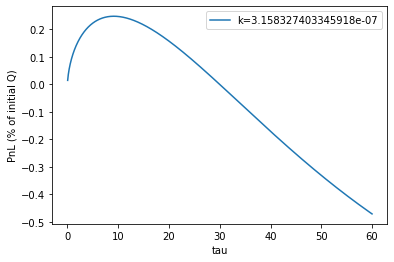

In [24]:
# now make the graph pretty ...
# y axis is % of initial Q at risk to printing as PnL
df_vars.plot(x='tau', y=f"k={df_ks['alpha=0.05'][29]}", ylabel="PnL (% of initial Q)")

<AxesSubplot:xlabel='tau', ylabel='PnL (% of initial Q)'>

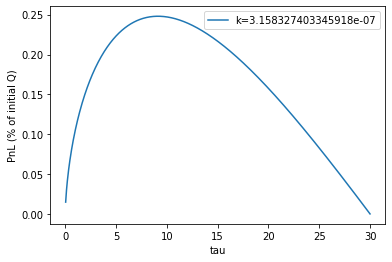

In [25]:
# Look at VaR only over the anchor time ... (first 30d)
df_vars[:720].plot(x='tau', y=f"k={df_ks['alpha=0.05'][29]}", ylabel="PnL (% of initial Q)")

In [26]:
# Max 95% VaR value occurs about 7d in at 25% of initial Q. Should use ES to calibrate OI caps! ...

In [27]:
# Look at EV first. It won't be a good measure of how to set OI caps because of losses in there, but still look

In [28]:
FILENAME_EVS = f"{FILEPATH}-nevs-long-alpha-0.05.csv"

In [29]:
df_evs = pd.read_csv(FILENAME_EVS)
df_evs

,Unnamed: 0,k=8.978757512936804e-07,k=7.267413010472394e-07,k=6.420114480155384e-07,k=5.878747660242412e-07,k=5.489995419952228e-07,k=5.191209815782905e-07,k=4.951090149472851e-07,k=4.7519193377437073e-07,k=4.582770594735901e-07,...,k=2.677086300668623e-07,k=2.660893824286825e-07,k=2.645101616462856e-07,k=2.629692505879826e-07,k=2.6146503586240116e-07,k=2.5999599979921576e-07,k=2.585607131804177e-07,k=2.5715782864008127e-07,k=2.557860746607888e-07,k=2.5444425010367986e-07
0,t=3600,-0.005654,-0.004428,-0.003821,-0.003432,-0.003153,-0.002939,-0.002766,-0.002623,-0.002502,...,-0.001132,-0.001121,-0.001109,-0.001098,-0.001087,-0.001077,-0.001066,-0.001056,-0.001046,-0.001037
1,t=7200,-0.011277,-0.008837,-0.007627,-0.006853,-0.006297,-0.005869,-0.005526,-0.005240,-0.004998,...,-0.002264,-0.002241,-0.002218,-0.002196,-0.002174,-0.002153,-0.002132,-0.002112,-0.002093,-0.002073
2,t=10800,-0.016868,-0.013228,-0.011420,-0.010263,-0.009432,-0.008792,-0.008278,-0.007851,-0.007489,...,-0.003395,-0.003360,-0.003326,-0.003293,-0.003261,-0.003229,-0.003198,-0.003168,-0.003138,-0.003109
3,t=14400,-0.022429,-0.017599,-0.015199,-0.013662,-0.012557,-0.011707,-0.011024,-0.010456,-0.009974,...,-0.004525,-0.004479,-0.004434,-0.004390,-0.004346,-0.004304,-0.004263,-0.004223,-0.004184,-0.004145
4,t=18000,-0.027959,-0.021952,-0.018964,-0.017050,-0.015674,-0.014614,-0.013762,-0.013055,-0.012454,...,-0.005655,-0.005597,-0.005541,-0.005486,-0.005432,-0.005379,-0.005328,-0.005278,-0.005228,-0.005180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,t=5169600,-0.999815,-0.998912,-0.997387,-0.995427,-0.993164,-0.990690,-0.988067,-0.985338,-0.982536,...,-0.874728,-0.872614,-0.870517,-0.868437,-0.866375,-0.864330,-0.862302,-0.860290,-0.858294,-0.856315
1436,t=5173200,-0.999816,-0.998917,-0.997398,-0.995445,-0.993189,-0.990722,-0.988106,-0.985384,-0.982588,...,-0.874934,-0.872821,-0.870726,-0.868649,-0.866589,-0.864545,-0.862519,-0.860509,-0.858515,-0.856537
1437,t=5176800,-0.999817,-0.998923,-0.997410,-0.995463,-0.993214,-0.990754,-0.988145,-0.985430,-0.982641,...,-0.875140,-0.873029,-0.870936,-0.868860,-0.866802,-0.864761,-0.862736,-0.860728,-0.858735,-0.856759
1438,t=5180400,-0.999818,-0.998928,-0.997421,-0.995481,-0.993239,-0.990786,-0.988183,-0.985475,-0.982693,...,-0.875345,-0.873236,-0.871145,-0.869071,-0.867015,-0.864975,-0.862952,-0.860946,-0.858955,-0.856981


In [30]:
f"k={df_ks['alpha=0.05'][29]}" in df_evs.columns

True

In [31]:
df_evs[f"k={df_ks['alpha=0.05'][29]}"]

0      -0.001478
1      -0.002955
2      -0.004430
3      -0.005904
4      -0.007377
          ...   
1435   -0.923834
1436   -0.923985
1437   -0.924136
1438   -0.924287
1439   -0.924438
Name: k=3.158327403345918e-07, Length: 1440, dtype: float64

<AxesSubplot:>

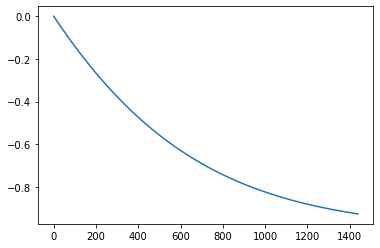

In [32]:
# look at the EV curve from 0 => 60d when holding a position, assuming alpha=0.05, t_alpha=30d for calibration
# imbalance completely to one side
df_evs[f"k={df_ks['alpha=0.05'][29]}"].plot()

In [33]:
# set tau back in df evs (remember, tau is in days)
df_evs['tau'] = taus
df_evs

,Unnamed: 0,k=8.978757512936804e-07,k=7.267413010472394e-07,k=6.420114480155384e-07,k=5.878747660242412e-07,k=5.489995419952228e-07,k=5.191209815782905e-07,k=4.951090149472851e-07,k=4.7519193377437073e-07,k=4.582770594735901e-07,...,k=2.660893824286825e-07,k=2.645101616462856e-07,k=2.629692505879826e-07,k=2.6146503586240116e-07,k=2.5999599979921576e-07,k=2.585607131804177e-07,k=2.5715782864008127e-07,k=2.557860746607888e-07,k=2.5444425010367986e-07,tau
0,t=3600,-0.005654,-0.004428,-0.003821,-0.003432,-0.003153,-0.002939,-0.002766,-0.002623,-0.002502,...,-0.001121,-0.001109,-0.001098,-0.001087,-0.001077,-0.001066,-0.001056,-0.001046,-0.001037,0.041667
1,t=7200,-0.011277,-0.008837,-0.007627,-0.006853,-0.006297,-0.005869,-0.005526,-0.005240,-0.004998,...,-0.002241,-0.002218,-0.002196,-0.002174,-0.002153,-0.002132,-0.002112,-0.002093,-0.002073,0.083333
2,t=10800,-0.016868,-0.013228,-0.011420,-0.010263,-0.009432,-0.008792,-0.008278,-0.007851,-0.007489,...,-0.003360,-0.003326,-0.003293,-0.003261,-0.003229,-0.003198,-0.003168,-0.003138,-0.003109,0.125000
3,t=14400,-0.022429,-0.017599,-0.015199,-0.013662,-0.012557,-0.011707,-0.011024,-0.010456,-0.009974,...,-0.004479,-0.004434,-0.004390,-0.004346,-0.004304,-0.004263,-0.004223,-0.004184,-0.004145,0.166667
4,t=18000,-0.027959,-0.021952,-0.018964,-0.017050,-0.015674,-0.014614,-0.013762,-0.013055,-0.012454,...,-0.005597,-0.005541,-0.005486,-0.005432,-0.005379,-0.005328,-0.005278,-0.005228,-0.005180,0.208333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,t=5169600,-0.999815,-0.998912,-0.997387,-0.995427,-0.993164,-0.990690,-0.988067,-0.985338,-0.982536,...,-0.872614,-0.870517,-0.868437,-0.866375,-0.864330,-0.862302,-0.860290,-0.858294,-0.856315,59.833333
1436,t=5173200,-0.999816,-0.998917,-0.997398,-0.995445,-0.993189,-0.990722,-0.988106,-0.985384,-0.982588,...,-0.872821,-0.870726,-0.868649,-0.866589,-0.864545,-0.862519,-0.860509,-0.858515,-0.856537,59.875000
1437,t=5176800,-0.999817,-0.998923,-0.997410,-0.995463,-0.993214,-0.990754,-0.988145,-0.985430,-0.982641,...,-0.873029,-0.870936,-0.868860,-0.866802,-0.864761,-0.862736,-0.860728,-0.858735,-0.856759,59.916667
1438,t=5180400,-0.999818,-0.998928,-0.997421,-0.995481,-0.993239,-0.990786,-0.988183,-0.985475,-0.982693,...,-0.873236,-0.871145,-0.869071,-0.867015,-0.864975,-0.862952,-0.860946,-0.858955,-0.856981,59.958333


<AxesSubplot:xlabel='tau', ylabel='PnL (% of initial Q)'>

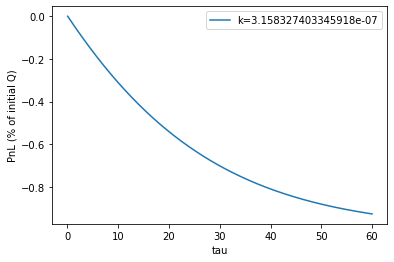

In [34]:
# now make the graph pretty ...
# y axis is % of initial Q expected to be printed as PnL
df_evs.plot(x='tau', y=f"k={df_ks['alpha=0.05'][29]}", ylabel="PnL (% of initial Q)")

<AxesSubplot:xlabel='tau', ylabel='PnL (% of initial Q)'>

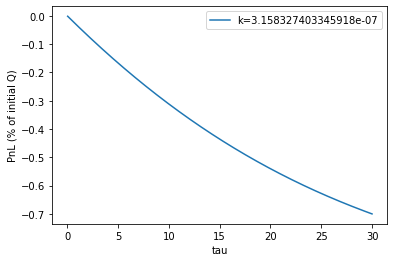

In [35]:
# Look at EV only over the anchor time ... (first 30d)
df_evs[:720].plot(x='tau', y=f"k={df_ks['alpha=0.05'][29]}", ylabel="PnL (% of initial Q)")

In [36]:
# Yup use ES to calibrate caps on initial Q ... since EV decays like e**(-constant * t) the longer position is held
# NOTE: negative EV to hold position throughout entire anchor time when trading against ONLY the protocol, due to funding

In [37]:
FILENAME_ESS = f"{FILEPATH}-ness-long-conditional-alpha-0.05.csv"

In [38]:
df_ess = pd.read_csv(FILENAME_ESS)
df_ess

,Unnamed: 0,k=8.978757512936804e-07,k=7.267413010472394e-07,k=6.420114480155384e-07,k=5.878747660242412e-07,k=5.489995419952228e-07,k=5.191209815782905e-07,k=4.951090149472851e-07,k=4.7519193377437073e-07,k=4.582770594735901e-07,...,k=2.677086300668623e-07,k=2.660893824286825e-07,k=2.645101616462856e-07,k=2.629692505879826e-07,k=2.6146503586240116e-07,k=2.5999599979921576e-07,k=2.585607131804177e-07,k=2.5715782864008127e-07,k=2.557860746607888e-07,k=2.5444425010367986e-07
0,t=3600,0.051703,0.053000,0.053643,0.054054,0.054349,0.054575,0.054758,0.054909,0.055038,...,0.056486,0.056498,0.056510,0.056522,0.056534,0.056545,0.056556,0.056566,0.056577,0.056587
1,t=7200,0.083819,0.086493,0.087820,0.088668,0.089278,0.089746,0.090123,0.090436,0.090702,...,0.093699,0.093724,0.093749,0.093773,0.093797,0.093820,0.093843,0.093865,0.093887,0.093908
2,t=10800,0.110883,0.114997,0.117040,0.118347,0.119286,0.120009,0.120590,0.121072,0.121482,...,0.126108,0.126147,0.126185,0.126223,0.126260,0.126295,0.126330,0.126364,0.126398,0.126430
3,t=14400,0.134952,0.140560,0.143346,0.145130,0.146413,0.147400,0.148194,0.148853,0.149412,...,0.155738,0.155792,0.155845,0.155896,0.155946,0.155995,0.156043,0.156089,0.156135,0.156180
4,t=18000,0.156901,0.164050,0.167607,0.169884,0.171523,0.172784,0.173798,0.174640,0.175355,...,0.183446,0.183515,0.183583,0.183648,0.183712,0.183775,0.183836,0.183896,0.183954,0.184012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,t=5169600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1436,t=5173200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1437,t=5176800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1438,t=5180400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [39]:
f"k={df_ks['alpha=0.05'][29]}" in df_ess.columns

True

In [40]:
# :) all positive as should be ....
df_ess[f"k={df_ks['alpha=0.05'][29]}"]

0       0.056120
1       0.092941
2       0.124938
3       0.154137
4       0.181398
          ...   
1435    0.000000
1436    0.000000
1437    0.000000
1438    0.000000
1439    0.000000
Name: k=3.158327403345918e-07, Length: 1440, dtype: float64

<AxesSubplot:>

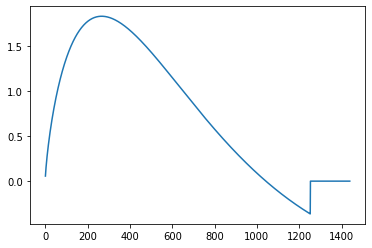

In [41]:
# look at the ES curve from 0 => 60d when holding a position, assuming alpha=0.05, t_alpha=30d for calibration
# imbalance completely to one side
df_ess[f"k={df_ks['alpha=0.05'][29]}"].plot()

In [42]:
# TODO: something's wrong with the calculation after 1200. Has to do with my setting to 0 when g_inv < F^{-1}

In [43]:
# Above is the conditional ES ... to get unconditional numbers, multiply by alpha = 0.05

In [44]:
# set tau back in df ess (remember, tau is in days)
df_ess['tau'] = taus
df_ess

,Unnamed: 0,k=8.978757512936804e-07,k=7.267413010472394e-07,k=6.420114480155384e-07,k=5.878747660242412e-07,k=5.489995419952228e-07,k=5.191209815782905e-07,k=4.951090149472851e-07,k=4.7519193377437073e-07,k=4.582770594735901e-07,...,k=2.660893824286825e-07,k=2.645101616462856e-07,k=2.629692505879826e-07,k=2.6146503586240116e-07,k=2.5999599979921576e-07,k=2.585607131804177e-07,k=2.5715782864008127e-07,k=2.557860746607888e-07,k=2.5444425010367986e-07,tau
0,t=3600,0.051703,0.053000,0.053643,0.054054,0.054349,0.054575,0.054758,0.054909,0.055038,...,0.056498,0.056510,0.056522,0.056534,0.056545,0.056556,0.056566,0.056577,0.056587,0.041667
1,t=7200,0.083819,0.086493,0.087820,0.088668,0.089278,0.089746,0.090123,0.090436,0.090702,...,0.093724,0.093749,0.093773,0.093797,0.093820,0.093843,0.093865,0.093887,0.093908,0.083333
2,t=10800,0.110883,0.114997,0.117040,0.118347,0.119286,0.120009,0.120590,0.121072,0.121482,...,0.126147,0.126185,0.126223,0.126260,0.126295,0.126330,0.126364,0.126398,0.126430,0.125000
3,t=14400,0.134952,0.140560,0.143346,0.145130,0.146413,0.147400,0.148194,0.148853,0.149412,...,0.155792,0.155845,0.155896,0.155946,0.155995,0.156043,0.156089,0.156135,0.156180,0.166667
4,t=18000,0.156901,0.164050,0.167607,0.169884,0.171523,0.172784,0.173798,0.174640,0.175355,...,0.183515,0.183583,0.183648,0.183712,0.183775,0.183836,0.183896,0.183954,0.184012,0.208333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,t=5169600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.833333
1436,t=5173200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.875000
1437,t=5176800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.916667
1438,t=5180400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.958333


<AxesSubplot:xlabel='tau', ylabel='PnL (% of initial Q)'>

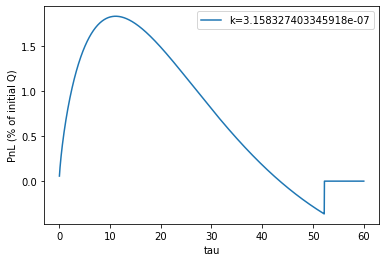

In [45]:
# now make the graph pretty ...
# y axis is % of initial Q expected to be printed as PnL (conditional ES)
df_ess.plot(x='tau', y=f"k={df_ks['alpha=0.05'][29]}", ylabel="PnL (% of initial Q)")

<AxesSubplot:xlabel='tau', ylabel='PnL (% of initial Q)'>

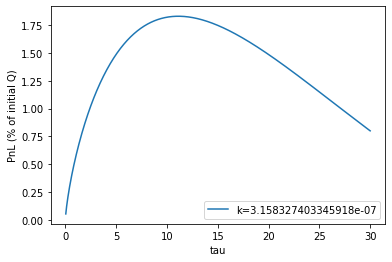

In [46]:
# Look at ES only over the anchor time ... (first 30d)
df_ess[:720].plot(x='tau', y=f"k={df_ks['alpha=0.05'][29]}", ylabel="PnL (% of initial Q)")

In [47]:
# calibrate cap on Q off of area under curve over the anchor time divided by anchor time .. (first 30d)
# NOTE: this is expected amount printed *when* pnl exceeds var

<AxesSubplot:>

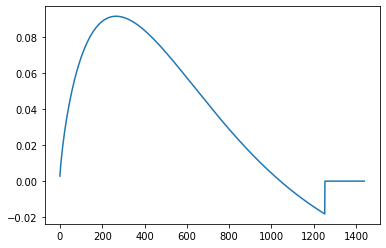

In [48]:
# unconditional ES numbers are alpha * conditional ES
# NOTE: calibrate cap on Q off unconditional ES to facilitate trading
(0.05 * df_ess[f"k={df_ks['alpha=0.05'][29]}"]).plot()

<AxesSubplot:>

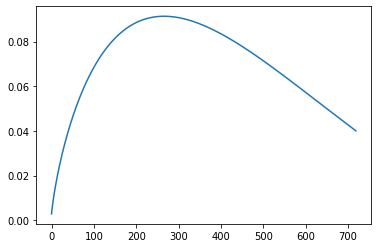

In [49]:
(0.05 * df_ess[f"k={df_ks['alpha=0.05'][29]}"])[:720].plot()

In [50]:
# approximate integration w cum sum
((0.05 * df_ess[f"k={df_ks['alpha=0.05'][29]}"])[:720]).cumsum()

0       0.002806
1       0.007453
2       0.013700
3       0.021407
4       0.030477
         ...    
715    50.095869
716    50.136332
717    50.176654
718    50.216832
719    50.256867
Name: k=3.158327403345918e-07, Length: 720, dtype: float64

In [51]:
# "time average" is last element of cumsum divided by length of cumsum array
print('sum', ((0.05 * df_ess[f"k={df_ks['alpha=0.05'][29]}"])[:720]).sum())
print('avg', ((0.05 * df_ess[f"k={df_ks['alpha=0.05'][29]}"])[:720]).sum() / 720.0)

sum 50.25686737930157
avg 0.0698012046934744


In [52]:
# About 7% of initial Q should expect to print over 30d anchor time on average
# to account for times when PnL exceeds VaR (and imbalance all to one side)

In [53]:
# If only down to inflate currency supply of 50% for first year with 5 markets, so 10% each market,
# this ETH/USDC market has 10% / 12 = 0.83333% of total supply printed every month
0.1 / 12

0.008333333333333333

In [54]:
(0.1 / 12) / 0.0698012046934744

0.11938666918326703

In [55]:
# cap on Q can then be set around 12% of total supply for ETH/USDC market
# for unconditional expected shortfall per 30d to average around
# 0.1 / 12 per month or 10% of total supply printed by market per year